In [21]:
import pandas as pd
from sklearn import datasets

titanic_url = ('https://raw.githubusercontent.com/amueller/'
               'scipy-2017-sklearn/091d371/notebooks/datasets/titanic3.csv')
data = pd.read_csv(titanic_url)
data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [22]:
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isnull().sum()))
data.describe()

Number of instances = 1309
Number of attributes = 14
Number of missing values:
	pclass: 0
	survived: 0
	name: 0
	sex: 0
	age: 263
	sibsp: 0
	parch: 0
	ticket: 0
	fare: 1
	cabin: 1014
	embarked: 2
	boat: 823
	body: 1188
	home.dest: 564


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [14]:
#Load multi document

path = 'data/'
files = [path+'d'+str(i)+'.txt' for i in range(1,7)]
files

['data/d1.txt',
 'data/d2.txt',
 'data/d3.txt',
 'data/d4.txt',
 'data/d5.txt',
 'data/d6.txt']

In [16]:
from tqdm import tqdm

D = []
for f in files:
    df=open(f,"r",encoding="utf-8", errors='replace')
    D.append(df.readlines());df.close()
print(len(D))

data = [d for d in D]

for i,d in tqdm(enumerate(data)):
    data[i] = '. '.join(d)

6it [00:00, 6111.18it/s]

6


In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
Sastrawi_stopwords = factory.get_stop_words()
tf_vectorizer = CountVectorizer(stop_words=Sastrawi_stopwords, max_df=0.95, min_df=2,lowercase=True)
tf = tf_vectorizer.fit_transform(data)
tf_terms = tf_vectorizer.get_feature_names()
print(tf.shape)
print(tf_terms)
print(tf)

(6, 31)
['akhir', 'badan', 'banten', 'bmkg', 'daerah', 'data', 'geofisika', 'global', 'harga', 'investor', 'jumat', 'kabupaten', 'kata', 'kawasan', 'kepala', 'klimatologi', 'lebih', 'mencerna', 'menjadi', 'meteorologi', 'minyak', 'pandeglang', 'pasar', 'perdagangan', 'provinsi', 'satu', 'tahun', 'tinggi', 'tsunami', 'turun', 'wisata']
  (0, 26)	2
  (0, 29)	1
  (0, 16)	1
  (0, 10)	1
  (0, 5)	1
  (0, 17)	1
  (0, 9)	1
  (0, 22)	3
  (0, 7)	1
  (0, 23)	1
  (0, 0)	1
  (0, 20)	1
  (0, 8)	1
  (1, 1)	1
  (1, 12)	1
  (1, 18)	1
  (1, 29)	1
  (1, 16)	2
  (1, 10)	1
  (1, 5)	1
  (1, 17)	1
  (1, 9)	1
  (1, 22)	1
  (1, 7)	2
  (1, 23)	1
  :	:
  (3, 15)	2
  (3, 19)	2
  (3, 14)	1
  (3, 28)	3
  (3, 1)	2
  (3, 12)	1
  (4, 25)	1
  (4, 27)	3
  (4, 3)	1
  (4, 6)	1
  (4, 15)	1
  (4, 19)	1
  (4, 30)	1
  (4, 13)	3
  (4, 4)	1
  (4, 2)	3
  (4, 24)	2
  (4, 21)	1
  (4, 11)	1
  (4, 1)	1
  (4, 18)	1
  (4, 26)	1
  (5, 25)	1
  (5, 27)	1
  (5, 18)	2


In [4]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

dataset1 = [['Bread', 'Milk'],
           ['Bread', 'Diaper', 'Beer', 'Eggs'],
           ['Milk', 'Diaper', 'Beer', 'Coke' ],
           ['Bread', 'Milk', 'Diaper', 'Beer'],
           ['Bread', 'Milk', 'Diaper', 'Coke' ]]

te = TransactionEncoder()
te_ary = te.fit(dataset1).transform(dataset1)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,Beer,Bread,Coke,Diaper,Eggs,Milk
0,False,True,False,False,False,True
1,True,True,False,True,True,False
2,True,False,True,True,False,True
3,True,True,False,True,False,True
4,False,True,True,True,False,True


In [2]:
import pandas as pd

retail = pd.read_excel('Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [76]:
import pandas as pd

data = pd.read_csv('iris.csv', header = None)
X_data = data.iloc[:, :-1].values
y_target = data.iloc[:, -1].values

print(X_data.shape)
print(y_target.shape)
print(data.dtypes)

print(data.head())
print(data.tail())
print(data.describe())
print(data.median())
print(data.mad())

(150, 4)
(150,)
0    float64
1    float64
2    float64
3    float64
4     object
dtype: object
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica
                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.

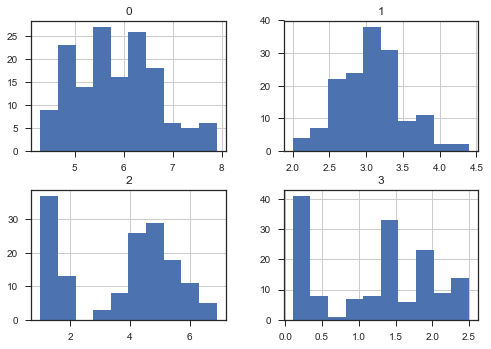

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(X_data, columns=['0', '1', '2', '3'])

df.hist()
plt.show()

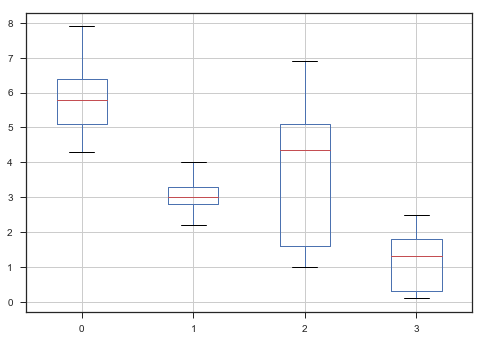

In [74]:
# box and whisker plots
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(X_data, columns=['0', '1', '2', '3'])
df.boxplot()
plt.show()

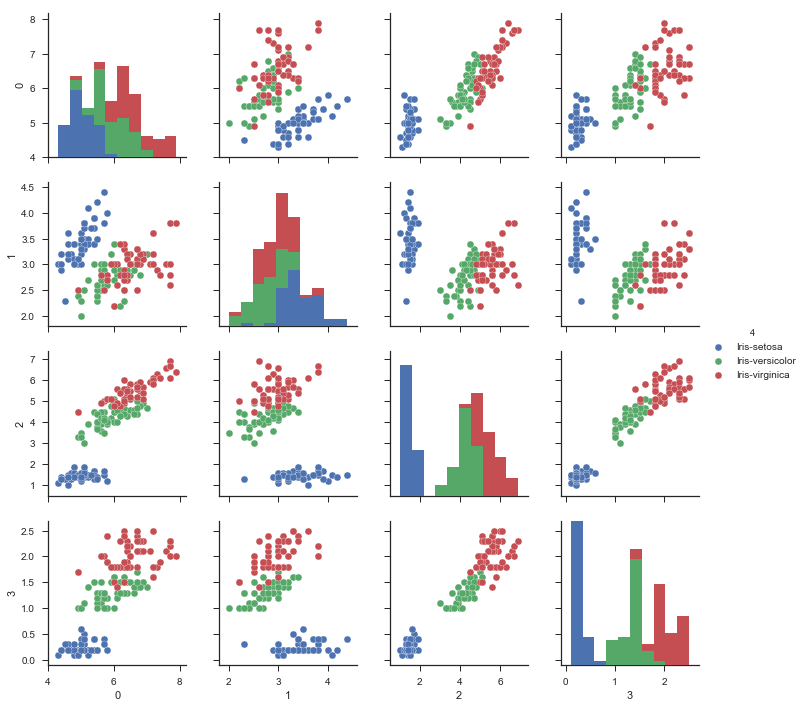

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
sns.pairplot(data, hue=4)
plt.show()

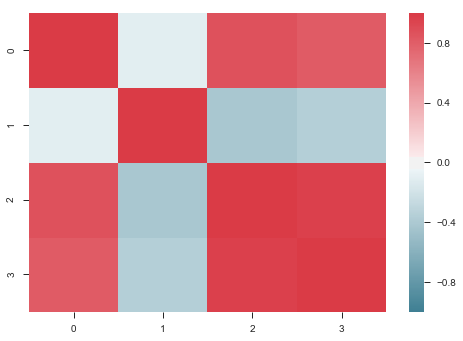

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.loc[:,data.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

In [70]:
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target
print(iris_data.shape)
print(iris_labels.shape)

(150, 4)
(150,)


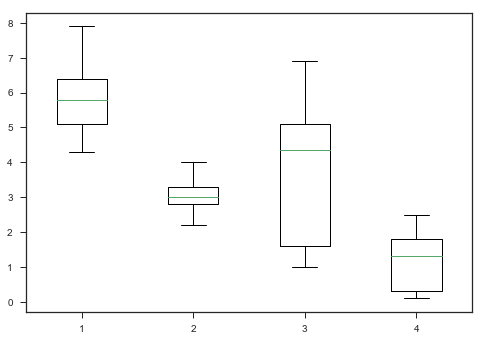

In [71]:
# box and whisker plots

import matplotlib.pyplot as plt

X = iris_data 
y = iris_labels

plt.boxplot(X)
plt.show()

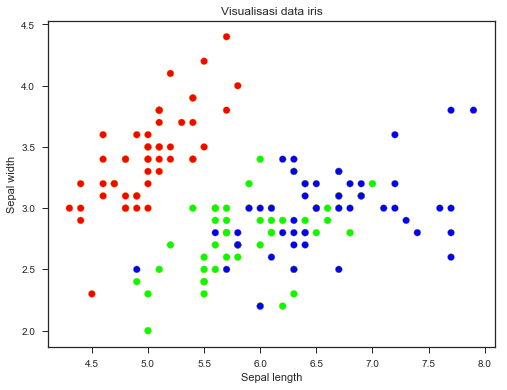

In [72]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X = iris_data 
y = iris_labels

cm_bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(8,6))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
            edgecolor='y')

plt.title('Visualisasi data iris')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

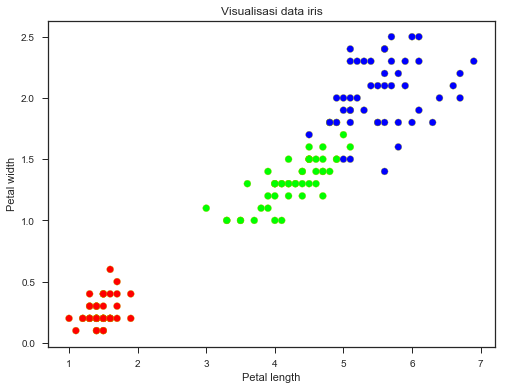

In [73]:
X = iris_data 
y = iris_labels

cm_bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(8,6))

plt.scatter(X[:, 2], X[:, 3], c=y, cmap=cm_bright,
            edgecolor='y')

plt.title('Visualisasi data iris')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()